# Chris Klausmeier's model for arid vegetation patterns
Although the Klausmeier model is not marine, we use it in this marine course because of the model's conciseness. This version of the model, with straightforward, single core computation in python, take very long to compute (850 seconds on my Macbook pro).
### Loading some crucial python packages

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import time
%matplotlib inline

# Widening the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Parameter definitions 

In [2]:
# Parameters       Original value    Explanation and Units
a        = 1.5     # 2.0             Rainfall rate
m        = 0.45    # 0.45            Mortality rate

v        = 182.0   # 182             The downslope advection of W 
dw       = 10.0    # 10              The diffusion constant of W
dn       = 1.0     # 1.0             The diffusion constant of N

### Simulation settings

In [3]:
EndTime  =  50.0   # total runtime
dt       = .001    # time step
NumPlots = 100     # number of plot updates

In [4]:
Size           = 512
Grid_Width     = Size    # size of the 2D grid
Grid_Height    = Size
LengthX        = Size    # length of the domain, forces as a float with a .
LengthY        = Size    # length of the domain, forces as a float with a .

dx = LengthX / Grid_Width  # space step
dy = LengthY / Grid_Height # space step

### Colormap definitions

In [5]:
Vegcolors = [(0.80, 0.58, 0.34), (0.97, 0.89, 0.62), (0.51, 0.63, 0.27), 
             (0.38, 0.51, 0.22), (0.31, 0.40, 0.21), (0.21, 0.32, 0.20)]
VegMap = LinearSegmentedColormap.from_list('AridVeg', Vegcolors, N=100)

### Defining the functions that compute the first and second order derivatives

In [6]:
def d2_dxy2(Z): # Second order derivative that assumes periodic boundary conditions
    Ztop = np.roll(Z, 1, axis=0)
    Zbottom = np.roll(Z, -1, axis=0)    
    Zleft = np.roll(Z, 1, axis=1)
    Zright = np.roll(Z, -1, axis=1)
    return (Zleft + Zright   - 2 * Z) / dx**2 + (Ztop  + Zbottom  - 2 * Z) / dy**2

In [7]:
def d_dy(Z): # First order derivative that assumes periodic boundary conditions
    Ztop = np.roll(Z, 1, axis=0)
    Zcenter = Z[:,:]
    return (Zcenter - Ztop) / dy

### The main simulation loop

In [8]:
def RunSim(EndTime, dt):
    
    # Initializing the data arrays and giving them starting values
    np.random.seed(10)
    W = np.zeros((Grid_Width, Grid_Height))+1.0
    N = (np.random.rand(Grid_Width, Grid_Height)<0.05)*1.0 + 1.0

    Ns=np.zeros((Grid_Width, Grid_Height, NumPlots))

    # We simulate the PDE with the finite difference method.
    for count in range(NumPlots):    
        for rep in range(int(EndTime/ dt / NumPlots)):
            # We update the variables.
            W, N = \
                W + dt * ( a - W - W*N*N - v*d_dy(W) + dw * d2_dxy2(W)),\
                N + dt * ( W*N*N - m*N + dn * d2_dxy2(N))

            # We store the state of the system for NumPlot different times.
            Ns[:,:,count] = N

    return Ns        

### Running the simulation

In [15]:
start_time = time.time() # Starting a timer
Ns=RunSim(EndTime, dt)
print(" Simulation took      : %1.1f (s)" % (time.time() - start_time))

 Simulation took      : 877.7 (s)


### Making a plot of the final result

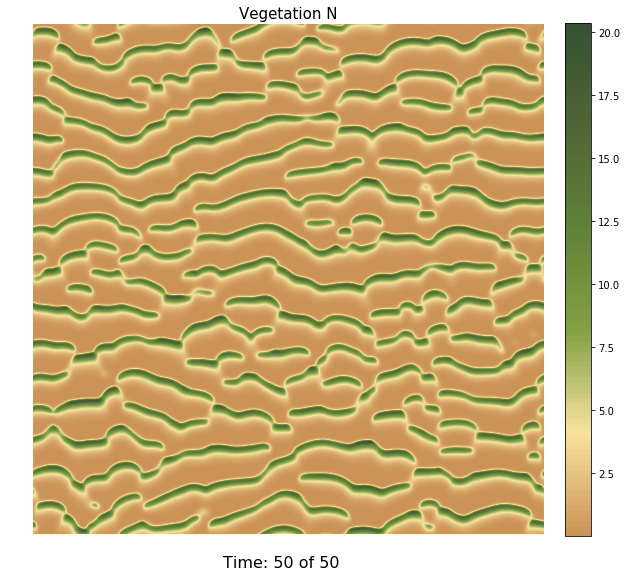

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
im=ax.imshow(Ns[:,:,NumPlots-1], cmap=VegMap, animated=True, interpolation='bilinear')
ax.set_title('Vegetation N', fontsize=15)
text=fig.suptitle("Time: %1.0f of %1.0f" % (EndTime, EndTime), x=0.47, y=0.12, fontsize=16);
ax.set_axis_off()
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04);

### Making a movie

In [14]:
from matplotlib import animation, rc

def updatefig(i): # To update the image at each iteration
    global Ns
    im.set_array(Ns[:,:,i])
    text.set_text("Time: %1.0f of %1.0f" % ((i+1)/NumPlots*EndTime, EndTime));
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=100, frames = NumPlots, repeat=False, blit=True)

from IPython.display import HTML
HTML(ani.to_html5_video())

© Johan van de Koppel, NIOZ-Yerseke 2018